In [91]:
import pandas as pd
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from random import shuffle
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split

In [92]:
load_data = pd.read_excel("/content/drive/MyDrive/Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [93]:
load_data.describe()

,5551.82208
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [94]:
load_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   5551.82208  2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


{'boxes': [<matplotlib.lines.Line2D at 0x7fab2c2f6bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab2c2805d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab2c292790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab2c284810>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab2c266790>,
  <matplotlib.lines.Line2D at 0x7fab2c27c850>]}

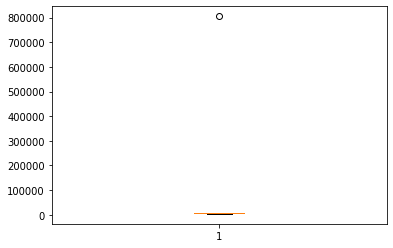

In [95]:
plt.boxplot(load_data.iloc[:,0])

In [96]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


In [97]:
load_data.iloc[928,0] = load_data.iloc[927,0]

{'boxes': [<matplotlib.lines.Line2D at 0x7fab2c2469d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fab2c202b50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fab2c209b90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fab2c209650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fab2c2020d0>,
  <matplotlib.lines.Line2D at 0x7fab2c202610>]}

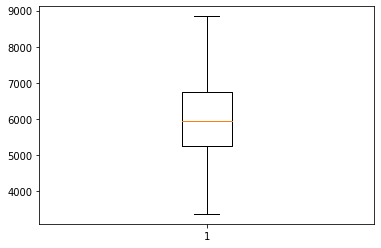

In [98]:
plt.boxplot(load_data.iloc[:,0])

In [99]:
x = []
y = []
for i in range(len(load_data.iloc[:,0])-24):
  x.append(load_data.iloc[i,0])
  y.append(load_data.iloc[i+24,0])

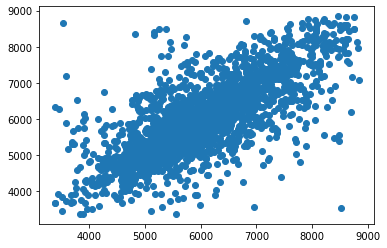

In [100]:
plt.scatter(x,y)

In [101]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)

def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [102]:
learning_rate = 0.01
epochs = 20

m = 1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9

batch_size = 500

In [103]:
x = minmax_scale(x)
y = minmax_scale(y)

In [104]:
data = []

for i in range(0,2159):
  data.append((x[i],y[i]))

print(len(data))

data_train,data_test = train_test_split(data,test_size=0.1)

len(data_train)

2159


1943

In [105]:
error_list = []
number_of_batches = (len(data_train)//batch_size)
for i in range(epochs):
  for j in range(number_of_batches+1):
    if j == number_of_batches:
      d = data_train[j*batch_size:]
    else:
      d = data_train[j*batch_size:(j+1)*batch_size]

    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c

    print("epoch {}, batch {}, error {}".format(i,j,error(d,m,c)))
    error_list.append(error(d,m,c))
  random.shuffle(data_train)

epoch 0, batch 0, error 0.5065469176689951
epoch 0, batch 1, error 0.46717608044889736
epoch 0, batch 2, error 0.44275827331387313
epoch 0, batch 3, error 0.4081902976998139
epoch 1, batch 0, error 0.364983897342467
epoch 1, batch 1, error 0.3104343135114158
epoch 1, batch 2, error 0.28336856238646296
epoch 1, batch 3, error 0.23415363869107705
epoch 2, batch 0, error 0.18835273600397925
epoch 2, batch 1, error 0.1520565687101681
epoch 2, batch 2, error 0.1258908353295004
epoch 2, batch 3, error 0.0943019170611291
epoch 3, batch 0, error 0.06929058192324355
epoch 3, batch 1, error 0.04948294840292037
epoch 3, batch 2, error 0.03348605916267192
epoch 3, batch 3, error 0.025021675271528484
epoch 4, batch 0, error 0.018016342711104083
epoch 4, batch 1, error 0.0107558230300785
epoch 4, batch 2, error 0.009002759341437893
epoch 4, batch 3, error 0.008458081752883248
epoch 5, batch 0, error 0.009891071232166362
epoch 5, batch 1, error 0.013352946968140881
epoch 5, batch 2, error 0.014260294

Text(0.5, 1.0, 'error graph')

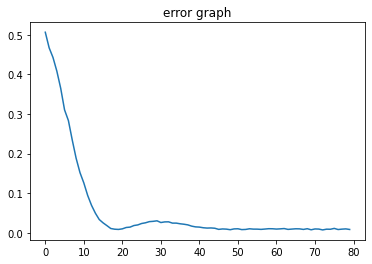

In [106]:
x1 = range(len(error_list))
y1 = error_list

plt.plot(x1,y1)
plt.title("error graph")

In [107]:
print("train error :",error(data_train,m,c))
print("test error :",error(data_test,m,c))

train error : 0.008875144909306439
test error : 0.00861446365625279


In [108]:
print(m,c)

0.6270612178688149 0.18401975535340442


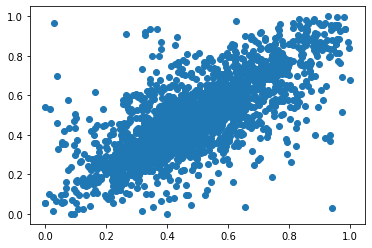

In [109]:
plt.scatter(x,y)

Text(0.5, 1.0, 'predicted line')

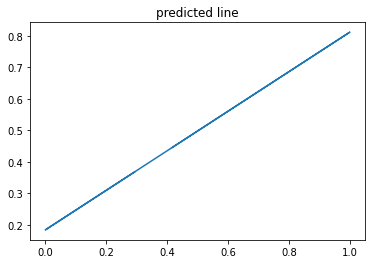

In [110]:
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)
plt.title("predicted line")

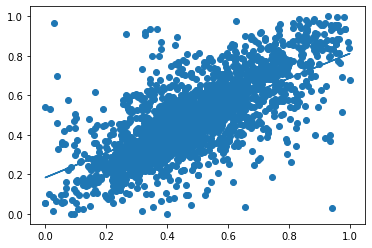

In [111]:
plt.scatter(x,y)
x1 = x
y1 = [i*m+c for i in x1]
plt.plot(x1,y1)

In [112]:
input_load = float(input("enter yesterday load at this time : "))

max_value = 8841.669480
min_value = 3377.919600

input_load = (input_load - min_value)/(max_value-min_value)
output_load = input_load*m+c

output_load = output_load*(max_value-min_value)+min_value

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 5010
predicted load for this hour is :  5406.771839513615
